### Задание
Домашнее задание по дисциплине направлено на решение комплексной задачи машинного обучения. Домашнее задание включает выполнение следующих шагов:

1. Поиск и выбор набора данных для построения моделей машинного обучения. На основе выбранного набора данных студент должен построить модели машинного обучения для решения или задачи классификации, или задачи регрессии.
2. Проведение разведочного анализа данных. Построение графиков, необходимых для понимания структуры данных. Анализ и заполнение пропусков в данных.
3. Выбор признаков, подходящих для построения моделей. Кодирование категориальных признаков. Масштабирование данных. Формирование вспомогательных признаков, улучшающих качество моделей.
4. Проведение корреляционного анализа данных. Формирование промежуточных выводов о возможности построения моделей машинного обучения. В зависимости от набора данных, порядок выполнения пунктов 2, 3, 4 может быть изменен.
5. Выбор метрик для последующей оценки качества моделей. Необходимо выбрать не менее двух метрик и обосновать выбор.
6. Выбор наиболее подходящих моделей для решения задачи классификации или регрессии. Необходимо использовать не менее трех моделей, хотя бы одна из которых должна быть ансамблевой.
7. Формирование обучающей и тестовой выборок на основе исходного набора данных.
8. Построение базового решения (baseline) для выбранных моделей без подбора гиперпараметров. Производится обучение моделей на основе обучающей выборки и оценка качества моделей на основе тестовой выборки.
9. Подбор гиперпараметров для выбранных моделей. Рекомендуется подбирать не более 1-2 гиперпараметров. Рекомендуется использовать методы кросс-валидации. В зависимости от используемой библиотеки можно применять функцию GridSearchCV, использовать перебор параметров в цикле, или использовать другие методы.
10. Повторение пункта 8 для найденных оптимальных значений гиперпараметров. Сравнение качества полученных моделей с качеством baseline-моделей.
11. Формирование выводов о качестве построенных моделей на основе выбранных метрик.

### Решение

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, median_absolute_error, r2_score 
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.svm import SVC, NuSVC, LinearSVC, OneClassSVM, SVR, NuSVR, LinearSVR
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.ensemble import ExtraTreesClassifier, ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.utils import shuffle
from gmdhpy import gmdh
%matplotlib inline 
sns.set(style="ticks")

### 1. Поиск и выбор набора данных для построения моделей машинного обучения. На основе выбранного набора данных  построение модели машинного обучения для решения или задачи регрессии.



age - age in years (возраст)

sex - (1 = male; 0 = female) (пол)

cp - chest pain type (тип боли в груди)

trestbps - resting blood pressure (in mm Hg on admission to the hospital) (кровяное давление в состоянии покоя)

chol - serum cholestoral in mg/dl (давление холестерина в сыворотке крови)

fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) (уровень сахара в крови натощак)

restecg - resting electrocardiographic results (электрокардиографические результаты покоя)

thalach - maximum heart rate achieved (максимальная частота сердечных сокращений)

exang - exercise induced angina (1 = yes; 0 = no) (стенокардия, вызванная физической нагрузкой)

oldpeak - ST depression induced by exercise relative to rest (понижение ST-сегмента на электрокардиограмме, вызванное физ. упражнениями по сравнению с состоянием покоя)

slope - the slope of the peak exercise ST segment (элевация сегмента ST)

ca - number of major vessels (0-3) colored by flourosopy (количество крупных сосудов (0-3), окрашенных по цвету)

thal - 3 = normal; 6 = fixed defect; 7 = reversable defect (результат талиевого стресс-теста)

target - 1 or 0 (целевой признак: наличие или отсутствие сердечного заболевания)


#### Поставим задачу предсказания  целевой переменной  по данным характеристикам. Построим модель машинного обучения для данного набора и решим задачу регрессии.

### 2. Проведение разведочного анализа данных. Построение графиков, необходимых для понимания структуры данных. Анализ и заполнение пропусков в данных.


In [3]:
data = pd.read_csv('heart.csv', sep=',')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
data.shape

(303, 14)

In [5]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [6]:
data.isnull().sum() 

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
data.dtypes 

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [8]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


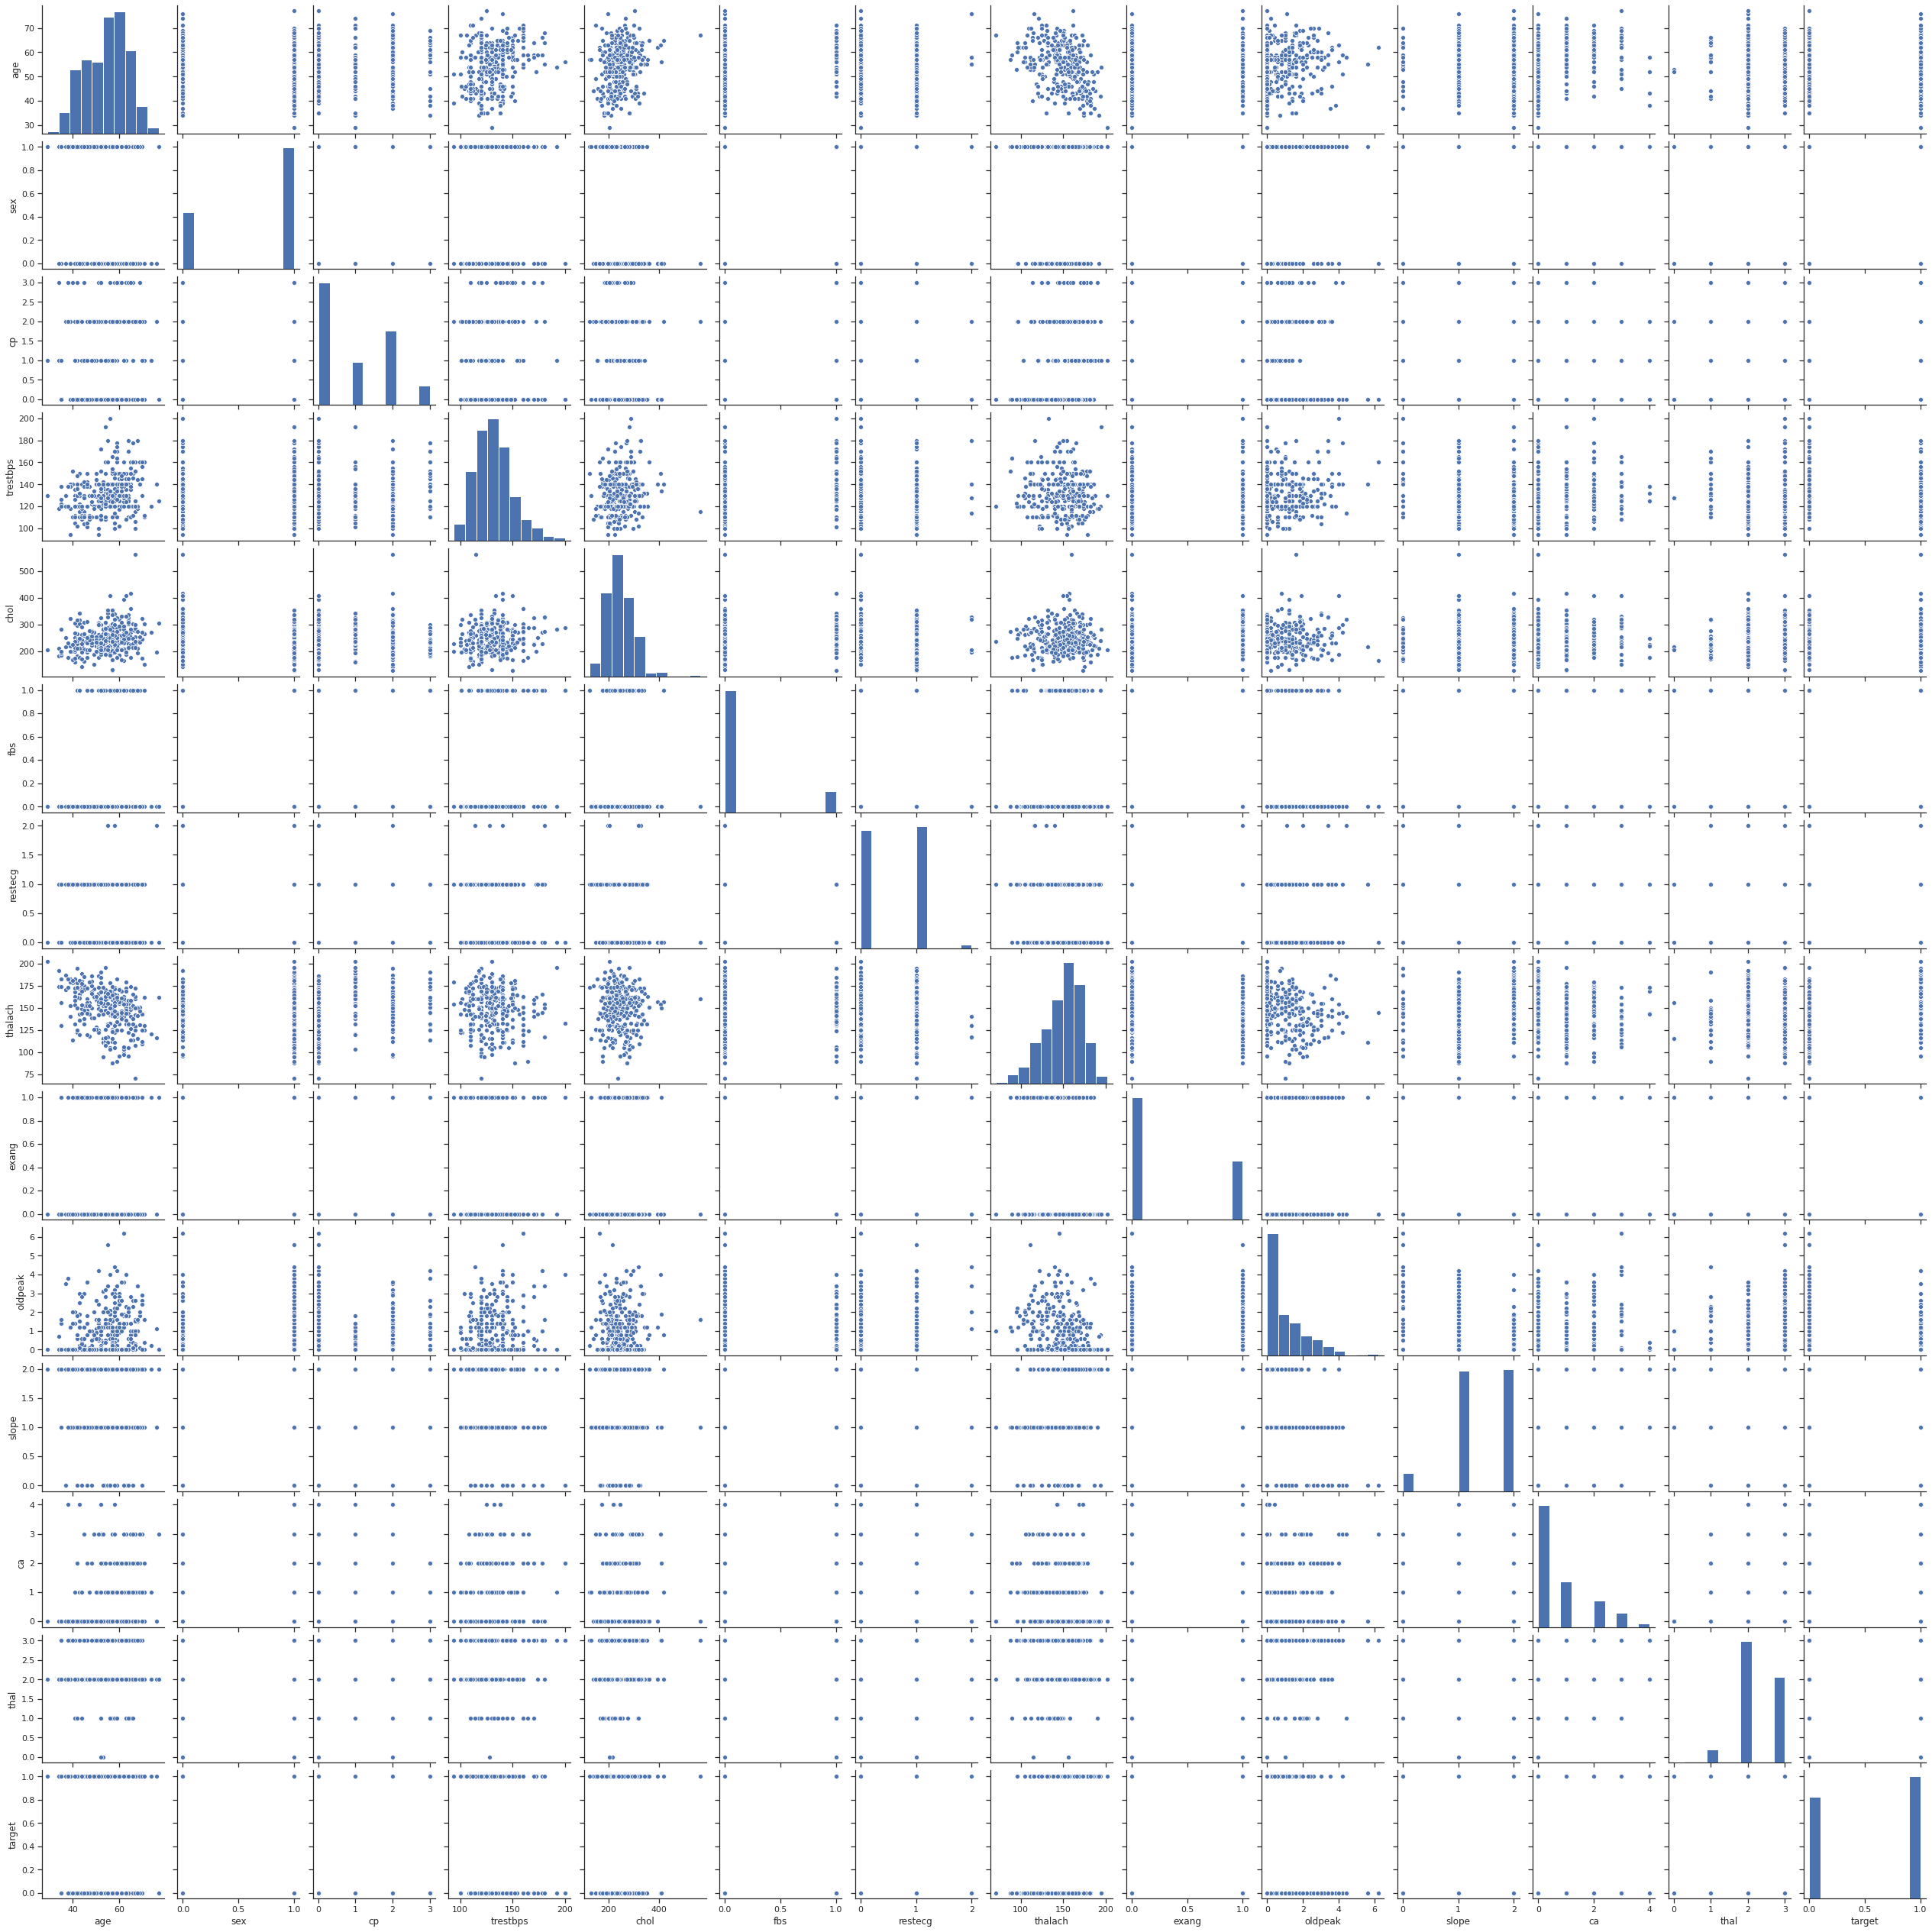

In [9]:
sns.pairplot(data)

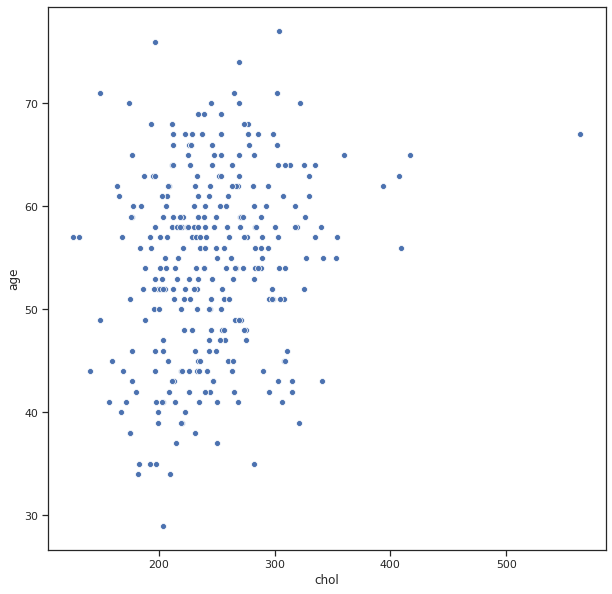

In [10]:
fig, ax = plt.subplots(figsize=(10,10))
sns.scatterplot(ax=ax, x='chol', y='age', data=data)

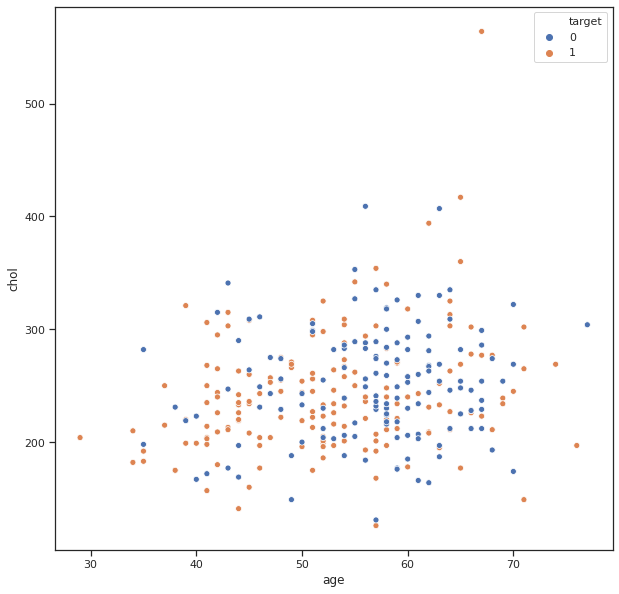

In [11]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.scatterplot(ax=ax, x='age', y='chol', data=data, hue='target')

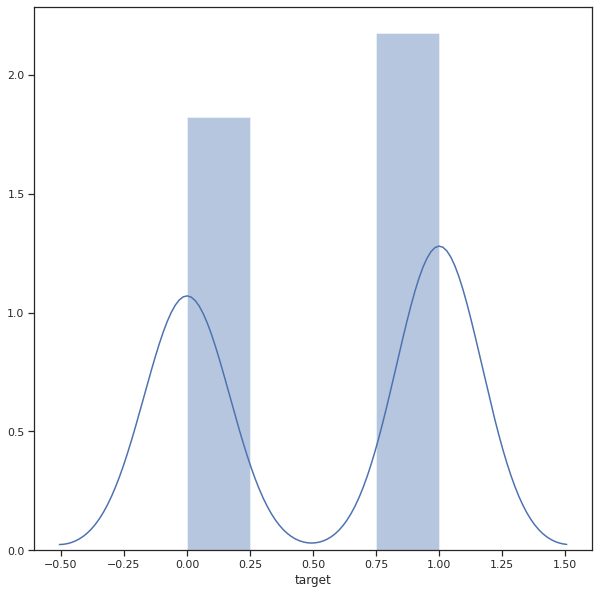

In [12]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.distplot(data['target'])

In [13]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

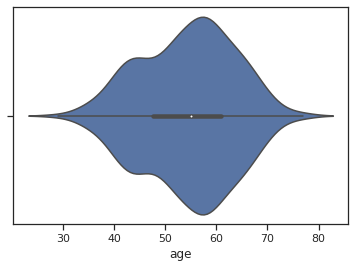

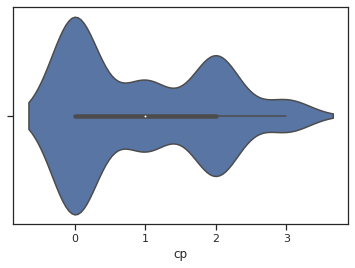

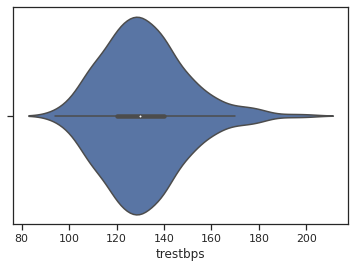

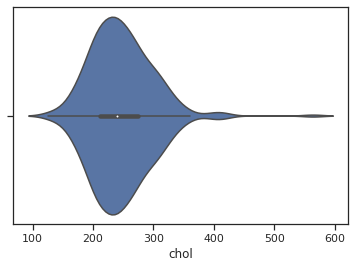

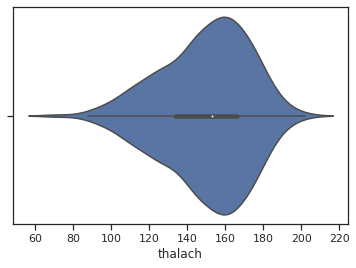

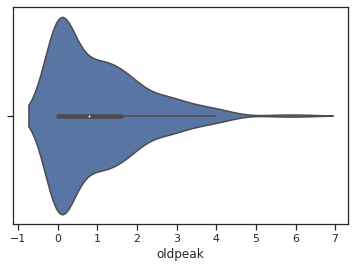

In [16]:
# Скрипичные диаграммы для числовых колонок
for col in [ 'age', 'cp', 'trestbps', 'chol',  'thalach', 'oldpeak']:
    
    sns.violinplot(x=data[col])
    plt.show()

#### Анализ и заполнение пропусков в данных. 
Поскольку в данном наборе пустых значений нет, пропустим данный пункт.

### 3. Выбор признаков, подходящих для построения моделей. Кодирование категориальных признаков. Масштабирование данных. Формирование вспомогательных признаков, улучшающих качество моделей.

#### Кодирование категориальных признаков числовыми

In [19]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

data.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [20]:
data.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


#### Масштабирование данных. 

In [23]:
scale_cols = ['age', 'sex', 'cp',
       'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal',
       'target']

In [24]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [25]:
sc1 = MinMaxScaler()
sc1_data = sc1.fit_transform(data[scale_cols])

In [26]:
# Добавим масштабированные данные в набор данных
for i in range(len(scale_cols)):
    col = scale_cols[i]
    new_col_name = col + '_scaled'
    data[new_col_name] = sc1_data[:,i]


In [27]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,chol_scaled,fbs_scaled,restecg_scaled,thalach_scaled,exang_scaled,oldpeak_scaled,slope_scaled,ca_scaled,thal_scaled,target_scaled
0,63,1,3,145,233,1,0,150,0,2.3,...,0.244292,1.0,0.0,0.603053,0.0,0.370968,0.0,0.0,0.333333,1.0
1,37,1,2,130,250,0,1,187,0,3.5,...,0.283105,0.0,0.5,0.885496,0.0,0.564516,0.0,0.0,0.666667,1.0
2,41,0,1,130,204,0,0,172,0,1.4,...,0.178082,0.0,0.0,0.770992,0.0,0.225806,1.0,0.0,0.666667,1.0
3,56,1,1,120,236,0,1,178,0,0.8,...,0.251142,0.0,0.5,0.816794,0.0,0.129032,1.0,0.0,0.666667,1.0
4,57,0,0,120,354,0,1,163,1,0.6,...,0.520548,0.0,0.5,0.702290,1.0,0.096774,1.0,0.0,0.666667,1.0


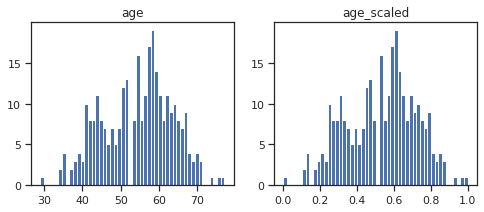

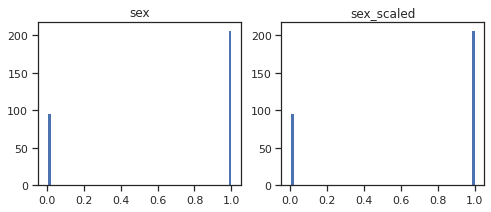

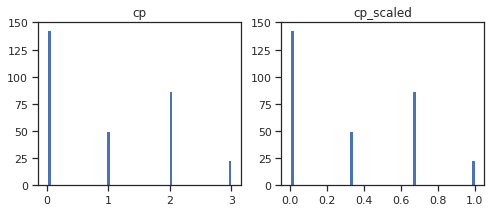

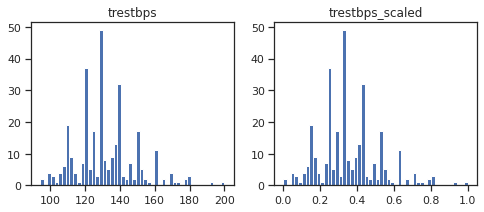

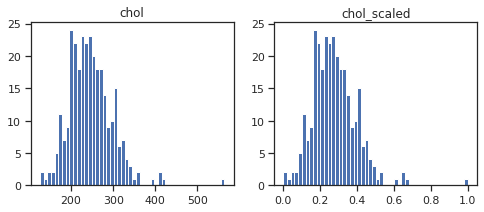

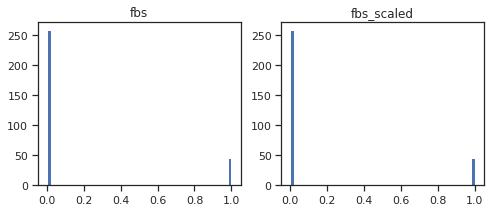

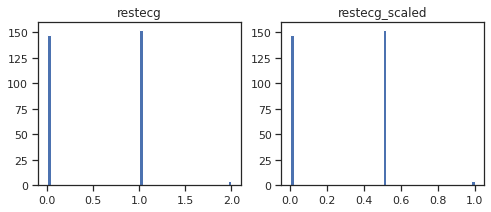

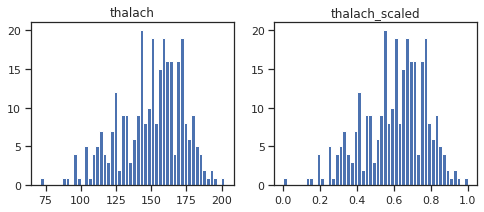

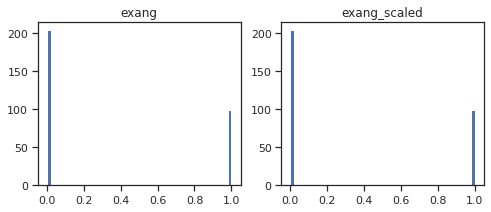

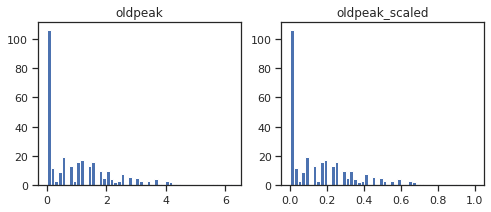

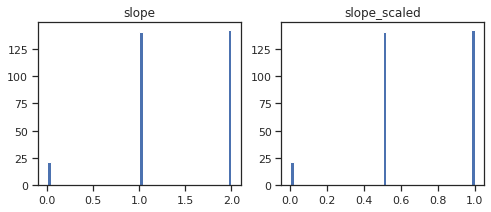

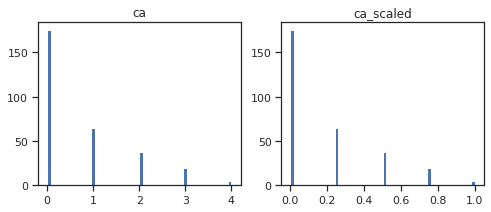

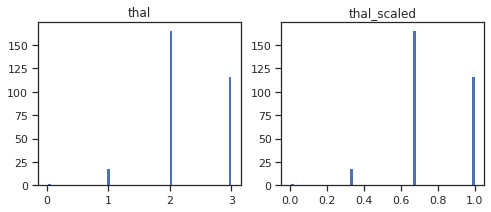

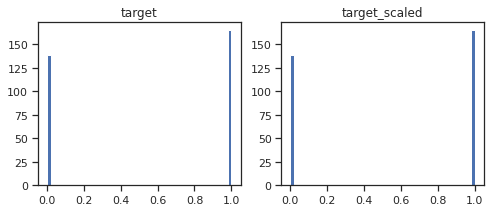

In [28]:
# Проверим, что масштабирование не повлияло на распределение данных
for col in scale_cols:
    col_scaled = col + '_scaled'

    fig, ax = plt.subplots(1, 2, figsize=(8,3))
    ax[0].hist(data[col], 50)
    ax[1].hist(data[col_scaled], 50)
    ax[0].title.set_text(col)
    ax[1].title.set_text(col_scaled)
    plt.show()

### 4. Проведение корреляционного анализа данных. Формирование промежуточных выводов о возможности построения моделей машинного обучения. 

In [29]:
# Воспользуемся наличием тестовых выборок, 
# включив их в корреляционную матрицу
corr_cols_1 = scale_cols
corr_cols_1

['age',
 'sex',
 'cp',
 'trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalach',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal',
 'target']

In [30]:
scale_cols_postfix = [x+'_scaled' for x in scale_cols]
corr_cols_2 = scale_cols_postfix
corr_cols_2

['age_scaled',
 'sex_scaled',
 'cp_scaled',
 'trestbps_scaled',
 'chol_scaled',
 'fbs_scaled',
 'restecg_scaled',
 'thalach_scaled',
 'exang_scaled',
 'oldpeak_scaled',
 'slope_scaled',
 'ca_scaled',
 'thal_scaled',
 'target_scaled']

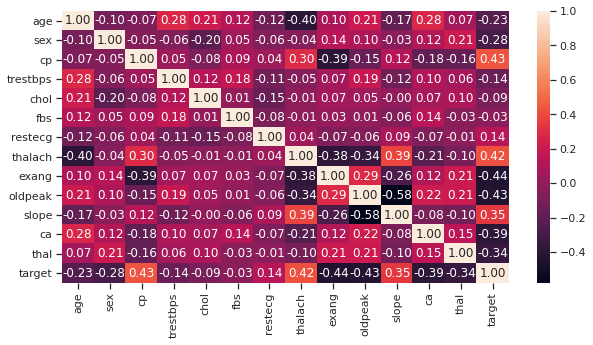

In [31]:
fig, ax = plt.subplots(figsize=(10,5))
sns.heatmap(data[corr_cols_1].corr(), annot=True, fmt='.2f')

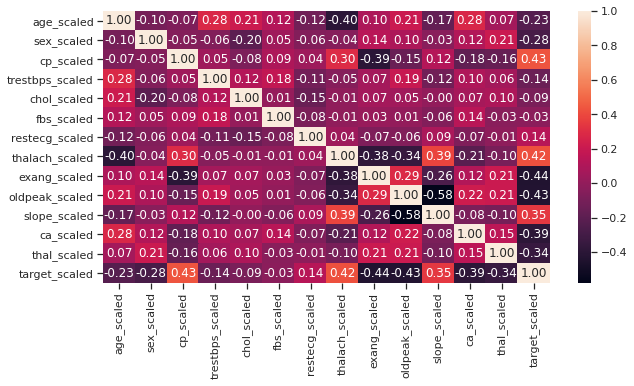

In [32]:
fig, ax = plt.subplots(figsize=(10,5))
sns.heatmap(data[corr_cols_2].corr(), annot=True, fmt='.2f')


- Наибольшую корреляцию  с таргет переменной имеет thalach(максимальный пульс) 

### 5. Выбор метрик для последующей оценки качества моделей. Необходимо выбрать не менее двух метрик и обосновать выбор.
Возьмем метрики MAE, Median Absolute Error и  R².
- MAE (Mean Absolute Error) — это среднее абсолютное значение ошибки(среднее модуля ошибки). Данная метрика удобна, так как показывает среднюю ошибку, но при этом не так чувствительна к выбросам, как, например, MSE.
- Медиана абсолютного отклонения(Median Absolute Error) - это альтернатива стандартного отклонения, но она менее чувствительна к воздействию промахов, чем среднее отклонение.
- Коэффициент детерминации, или R² покажет насколько модель соответствует или не соответствует данным.


In [33]:
class MetricLogger:
    
    def __init__(self):
        self.df = pd.DataFrame(
            {'metric': pd.Series([], dtype='str'),
            'alg': pd.Series([], dtype='str'),
            'value': pd.Series([], dtype='float')})

    def add(self, metric, alg, value):
        """
        Добавление значения
        """
        # Удаление значения если оно уже было ранее добавлено
        self.df.drop(self.df[(self.df['metric']==metric)&(self.df['alg']==alg)].index, inplace = True)
        # Добавление нового значения
        temp = [{'metric':metric, 'alg':alg, 'value':value}]
        self.df = self.df.append(temp, ignore_index=True)

    def get_data_for_metric(self, metric, ascending=True):
        """
        Формирование данных с фильтром по метрике
        """
        temp_data = self.df[self.df['metric']==metric]
        temp_data_2 = temp_data.sort_values(by='value', ascending=ascending)
        return temp_data_2['alg'].values, temp_data_2['value'].values
    
    def plot(self, str_header, metric, ascending=True, figsize=(5, 5)):
        """
        Вывод графика
        """
        array_labels, array_metric = self.get_data_for_metric(metric, ascending)
        fig, ax1 = plt.subplots(figsize=figsize)
        pos = np.arange(len(array_metric))
        rects = ax1.barh(pos, array_metric,
                         align='center',
                         height=0.5, 
                         tick_label=array_labels)
        ax1.set_title(str_header)
        for a,b in zip(pos, array_metric):
            plt.text(0.5, a-0.05, str(round(b,3)), color='white')
        plt.show()    

### 6. Выбор наиболее подходящих моделей для решения задачи  регрессии.
- Возьмем модели случайный лес и дерево решений, поскольку в проведенных экспериментах в лабораторных работах случайный лес показал себя наилучшим образом. Результаты, которые удалось получить при помощи данной модели были соспоставимы с результатами самых сильных среди протестированных ансамблевых моделей. Дерево решений так же дает хорошие результаты по сравнению с, например, линейными моделями.
- В качестве ансамблевой модели возьмем лучшую модель, полученную при выполнении 6 лабораторной работы: 'TREE+RF=>LR', то есть на первом уровне у нас будут две модели: дерево и случайный лес, а на втором уровне - линейная регрессия.

### 7. Формирование обучающей и тестовой выборок на основе исходного набора данных.

In [66]:
data1 = shuffle(data)
data1

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,chol_scaled,fbs_scaled,restecg_scaled,thalach_scaled,exang_scaled,oldpeak_scaled,slope_scaled,ca_scaled,thal_scaled,target_scaled
263,63,0,0,108,269,0,1,169,1,1.8,...,0.326484,0.0,0.5,0.748092,1.0,0.290323,0.5,0.50,0.666667,0.0
255,45,1,0,142,309,0,0,147,1,0.0,...,0.417808,0.0,0.0,0.580153,1.0,0.000000,0.5,0.75,1.000000,0.0
9,57,1,2,150,168,0,1,174,0,1.6,...,0.095890,0.0,0.5,0.786260,0.0,0.258065,1.0,0.00,0.666667,1.0
266,55,0,0,180,327,0,2,117,1,3.4,...,0.458904,0.0,1.0,0.351145,1.0,0.548387,0.5,0.00,0.666667,0.0
272,67,1,0,120,237,0,1,71,0,1.0,...,0.253425,0.0,0.5,0.000000,0.0,0.161290,0.5,0.00,0.666667,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,39,1,0,118,219,0,1,140,0,1.2,...,0.212329,0.0,0.5,0.526718,0.0,0.193548,0.5,0.00,1.000000,0.0
257,50,1,0,144,200,0,0,126,1,0.9,...,0.168950,0.0,0.0,0.419847,1.0,0.145161,0.5,0.00,1.000000,0.0
38,65,0,2,155,269,0,1,148,0,0.8,...,0.326484,0.0,0.5,0.587786,0.0,0.129032,1.0,0.00,0.666667,1.0
258,62,0,0,150,244,0,1,154,1,1.4,...,0.269406,0.0,0.5,0.633588,1.0,0.225806,0.5,0.00,0.666667,0.0


In [65]:
len(data1)

303

In [68]:
# На основе масштабированных данных выделим 
# обучающую и тестовую выборки
train_data_all = data1[:300]
test_data_all = data1[300:]
train_data_all.shape, test_data_all.shape

((300, 28), (3, 28))

In [69]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target', 'age_scaled',
       'sex_scaled', 'cp_scaled', 'trestbps_scaled', 'chol_scaled',
       'fbs_scaled', 'restecg_scaled', 'thalach_scaled', 'exang_scaled',
       'oldpeak_scaled', 'slope_scaled', 'ca_scaled', 'thal_scaled',
       'target_scaled'],
      dtype='object')

In [70]:
# Признаки для задачи регресии (опустим название)
task_regr_cols = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal',  'age_scaled',
       'sex_scaled', 'cp_scaled', 'trestbps_scaled', 'chol_scaled',
       'fbs_scaled', 'restecg_scaled', 'thalach_scaled', 'exang_scaled',
       'oldpeak_scaled', 'slope_scaled', 'ca_scaled', 'thal_scaled',
       ]

In [71]:
# Выборки для задачи регресии
regr_X_train = train_data_all[task_regr_cols]
regr_X_test = test_data_all[task_regr_cols]
regr_Y_train = train_data_all['target']
regr_Y_test = test_data_all['target']
regr_X_train.shape, regr_X_test.shape, regr_Y_train.shape, regr_Y_test.shape

((300, 26), (3, 26), (300,), (3,))

### 8. Построение базового решения (baseline) для выбранных моделей без подбора гиперпараметров. Производится обучение моделей на основе обучающей выборки и оценка качества моделей на основе тестовой выборки.

In [72]:
# Модели
regr_models = {'Tree':DecisionTreeRegressor(max_depth=10),
               'RF':RandomForestRegressor(max_depth=10, n_estimators=30),
              }

In [73]:
# Сохранение метрик
regrMetricLogger = MetricLogger()

In [74]:
def regr_train_model(model_name, model, regrMetricLogger):
    model.fit(regr_X_train, regr_Y_train)
    Y_pred = model.predict(regr_X_test)
    
    mae = mean_absolute_error(regr_Y_test, Y_pred)
    medae = median_absolute_error(regr_Y_test, Y_pred)
    r2 = r2_score(regr_Y_test, Y_pred)

    regrMetricLogger.add('MAE', model_name, mae)
    regrMetricLogger.add('MedAE', model_name, medae)
    regrMetricLogger.add('R2', model_name, r2)    
    
    print('*****************************************************')
    print(model)
    print()
    print('MAE={}, MedAE={}, R2={}'.format(
        round(mae, 3), round(medae, 3), round(r2, 3)))
    print('*****************************************************')

In [75]:
for model_name, model in regr_models.items():
    regr_train_model(model_name, model, regrMetricLogger)

*****************************************************
DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=10,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

MAE=0.333, MedAE=0.0, R2=-0.5
*****************************************************
*****************************************************
RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=10, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=30, n_jobs=None, o

#### Ансамблевая модель

In [77]:
from heamy.estimator import Regressor
from heamy.pipeline import ModelsPipeline
from heamy.dataset import Dataset
# набор данных
dataset = Dataset(regr_X_train, regr_Y_train, regr_X_test)
# Возьмем лучшую модель: 'TREE+RF=>LR'
# модели первого уровня
model_tree = Regressor(dataset=dataset, estimator=DecisionTreeRegressor, parameters={'max_depth':10},name='tree')
model_lr = Regressor(dataset=dataset, estimator=LinearRegression, name='lr')
model_rf = Regressor(dataset=dataset, estimator=RandomForestRegressor, parameters={'max_depth':10},name='rf')

# Первый уровень - две модели: дерево и случайный лес
# Второй уровень: линейная регрессия 
pipeline = ModelsPipeline(model_tree, model_rf)
stack_ds = pipeline.stack(k=10, seed=1)
# модель второго уровня
stacker = Regressor(dataset=stack_ds, estimator=LinearRegression)
results = stacker.validate(k=10,scorer=mean_absolute_error)
print()

results = stacker.validate(k=10,scorer=median_absolute_error)



Metric: mean_absolute_error
Folds accuracy: [0.2321812256482623, 0.2935264560365425, 0.3132380312317854, 0.2638845096079195, 0.2730932670706885, 0.35592967305601564, 0.29494220203767446, 0.2619861778578608, 0.26014224555907767, 0.29831826121629273]
Mean accuracy: 0.28472420493221196
Standard Deviation: 0.03271325316628694
Variance: 0.0010701569327215823

Metric: median_absolute_error
Folds accuracy: [0.16615336394853114, 0.1816134609239553, 0.20310743993392993, 0.2107032177104584, 0.22150122665195698, 0.39169282075650386, 0.1950647195077349, 0.18565121121247113, 0.13601325846677964, 0.2706781371307563]
Mean accuracy: 0.21621788562430777
Standard Deviation: 0.06745818235982066
Variance: 0.004550606367290821


### 9. Подбор гиперпараметров для выбранных моделей. 

#### Случайный лес

In [78]:
RandomForestRegressor().get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [79]:
n_range = np.array(range(0,50,5))
tuned_parameters = [{'max_depth': n_range}]
tuned_parameters

[{'max_depth': array([ 0,  5, 10, 15, 20, 25, 30, 35, 40, 45])}]

In [80]:
%%time
rf_gs = GridSearchCV(RandomForestRegressor(), tuned_parameters, cv=5, scoring='neg_mean_squared_error')
rf_gs.fit(regr_X_train, regr_Y_train)

/home/sef/anaconda3/envs/ml/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_depth must be greater than zero. 

  warnings.warn("Estimator fit failed. The score on this train-test"
/home/sef/anaconda3/envs/ml/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_depth must be greater than zero. 

  warnings.warn("Estimator fit failed. The score on this train-test"
/home/sef/anaconda3/envs/ml/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_depth must be greater than zero. 

  warnings.warn("Es

CPU times: user 5.05 s, sys: 15 ms, total: 5.06 s
Wall time: 5.26 s


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [81]:
# Лучшая модель
rf_gs.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=5, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [82]:
# Лучшее значение параметров
rf_gs.best_params_

{'max_depth': 5}

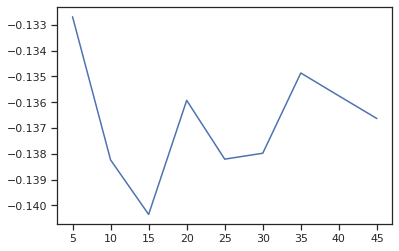

In [83]:
# Изменение качества на тестовой выборке в зависимости от К-соседей
plt.plot(n_range, rf_gs.cv_results_['mean_test_score'])

#### Дерево

In [84]:
DecisionTreeRegressor().get_params()

{'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': None,
 'splitter': 'best'}

In [85]:
n_range = np.array(range(0,50,5))

tuned_parameters = [{'max_depth': n_range}]
tuned_parameters

[{'max_depth': array([ 0,  5, 10, 15, 20, 25, 30, 35, 40, 45])}]

In [88]:
%%time
dt_gs = GridSearchCV(DecisionTreeRegressor(), tuned_parameters, cv=5, scoring='neg_mean_squared_error')
dt_gs.fit(regr_X_train, regr_Y_train)

CPU times: user 146 ms, sys: 391 µs, total: 146 ms
Wall time: 144 ms


/home/sef/anaconda3/envs/ml/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_depth must be greater than zero. 

  warnings.warn("Estimator fit failed. The score on this train-test"
/home/sef/anaconda3/envs/ml/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_depth must be greater than zero. 

  warnings.warn("Estimator fit failed. The score on this train-test"
/home/sef/anaconda3/envs/ml/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_depth must be greater than zero. 

  warnings.warn("Es

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=None, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=None,
                                             splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid=[{'max_depth': array([ 0,  5, 10, 15, 20, 25, 30, 35, 40, 45])}],
             pre_dispatch='2*n_jobs', refit=True, return_train_sc

In [89]:
# Лучшая модель
dt_gs.best_estimator_

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=5,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [90]:
# Лучшее значение параметров
dt_gs.best_params_

{'max_depth': 5}

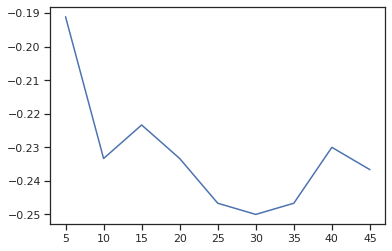

In [91]:
# Изменение качества на тестовой выборке 
plt.plot(n_range, dt_gs.cv_results_['mean_test_score'])

#### Ансамблевая модель

Поскольку параметры для случайного леса и дерева уже подобрали, то воспользуемся ими, а так же попробуем подобрать еще 2 параметра для данных моделей.
#### Decision tree

In [92]:
n_range = [0, 0.5, 1, 1.5, 2, 2.5, 3]
tuned_parameters = [{'min_impurity_split': n_range}]
tuned_parameters

[{'min_impurity_split': [0, 0.5, 1, 1.5, 2, 2.5, 3]}]

In [93]:
%%time
ens_dt_gs = GridSearchCV(DecisionTreeRegressor(), tuned_parameters, cv=5, scoring='neg_mean_squared_error')
ens_dt_gs.fit(regr_X_train, regr_Y_train)

CPU times: user 92.8 ms, sys: 4.34 ms, total: 97.1 ms
Wall time: 91 ms


/home/sef/anaconda3/envs/ml/lib/python3.8/site-packages/sklearn/tree/_classes.py:297: FutureWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/home/sef/anaconda3/envs/ml/lib/python3.8/site-packages/sklearn/tree/_classes.py:297: FutureWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/home/sef/anaconda3/envs/ml/lib/python3.8/site-packages/sklearn/tree/_classes.py:297: FutureWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=None, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=None,
                                             splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid=[{'min_impurity_split': [0, 0.5, 1, 1.5, 2, 2.5, 3]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,


In [94]:
# Лучшая модель
ens_dt_gs.best_estimator_

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=0,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [95]:
# Лучшее значение параметров
ens_dt_gs.best_params_

{'min_impurity_split': 0}

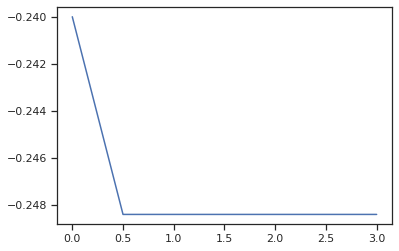

In [96]:
# Изменение качества на тестовой выборке 
plt.plot(n_range, ens_dt_gs.cv_results_['mean_test_score'])

##### Random Forest

In [97]:
n_range = [1, 5, 10, 20, 30, 40 ,50 ,60]
tuned_parameters = [{'n_estimators': n_range}]
tuned_parameters

[{'n_estimators': [1, 5, 10, 20, 30, 40, 50, 60]}]

In [98]:
%%time
ens_rf_gs = GridSearchCV(RandomForestRegressor(), tuned_parameters, cv=5, scoring='neg_mean_squared_error')
ens_rf_gs.fit(regr_X_train, regr_Y_train)

CPU times: user 1.31 s, sys: 7.25 ms, total: 1.32 s
Wall time: 1.32 s


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [99]:
# Лучшая модель
ens_rf_gs.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=60, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [100]:
# Лучшее значение параметров
ens_rf_gs.best_params_

{'n_estimators': 60}

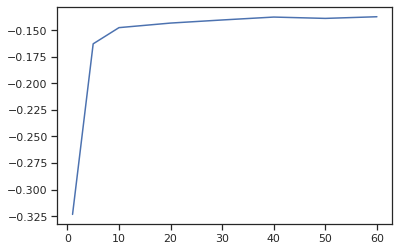

In [101]:
# Изменение качества на тестовой выборке 
plt.plot(n_range, ens_rf_gs.cv_results_['mean_test_score'])

### 10. Повторение пункта 8 для найденных оптимальных значений гиперпараметров. Сравнение качества полученных моделей с качеством baseline-моделей.

In [102]:
regr_models_grid = {'Tree':dt_gs.best_estimator_,
                   'RF': rf_gs.best_estimator_
                   }

In [103]:
for model_name, model in regr_models_grid.items():
    regr_train_model(model_name, model, regrMetricLogger)

*****************************************************
DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=5,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

MAE=0.194, MedAE=0.0, R2=0.49
*****************************************************
*****************************************************
RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=5, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oo

Удалось немного улучшить модель дерева решений и достаточно неплохо улучшить модель случайный лес

#### Ансамблевый метод

In [104]:
# # # Возьмем лучшую модель: 'TREE+RF=>LR'
# # # модели первого уровня
model_tree = Regressor(dataset=dataset,
                       estimator=DecisionTreeRegressor,
                       parameters={'min_impurity_split':1.5,
                                  'max_depth':5},name='tree')
model_lr = Regressor(dataset=dataset,
                     estimator=LinearRegression,
                     name='lr')
model_rf = Regressor(dataset=dataset,
                     estimator=RandomForestRegressor,
                     parameters={'n_estimators': 60,
                                'max_depth': 40},name='rf')

# Первый уровень - две модели: дерево и случайный лес
# Второй уровень: линейная регрессия 
pipeline = ModelsPipeline(model_tree, model_rf)
stack_ds = pipeline.stack(k=10, seed=1)
# модель второго уровня
stacker = Regressor(dataset=stack_ds, estimator=LinearRegression)


/home/sef/anaconda3/envs/ml/lib/python3.8/site-packages/sklearn/tree/_classes.py:297: FutureWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/home/sef/anaconda3/envs/ml/lib/python3.8/site-packages/sklearn/tree/_classes.py:297: FutureWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/home/sef/anaconda3/envs/ml/lib/python3.8/site-packages/sklearn/tree/_classes.py:297: FutureWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter

In [106]:
results = stacker.validate(k=10,scorer=mean_absolute_error)
print()

results = stacker.validate(k=10,scorer=median_absolute_error)


Metric: mean_absolute_error
Folds accuracy: [0.25434240843228223, 0.30934978777346706, 0.31152706398627295, 0.2688050699559702, 0.2722626131437003, 0.3424950072241695, 0.29319036195807285, 0.2550774575769754, 0.26292420094077856, 0.29060893432218377]
Mean accuracy: 0.28605829053138726
Standard Deviation: 0.027270349615929876
Variance: 0.0007436719681750466

Metric: median_absolute_error
Folds accuracy: [0.17797232102549643, 0.20037232397382754, 0.24265314533402438, 0.18631143650234816, 0.2190557805130846, 0.33628563384981947, 0.19262186142110616, 0.21483525007635285, 0.15282807595084202, 0.27754862314990225]
Mean accuracy: 0.2200484451796804
Standard Deviation: 0.050914655072882224
Variance: 0.0025923021011905714


### 11. Формирование выводов о качестве построенных моделей на основе выбранных метрик.

In [107]:
# Метрики качества модели
regr_metrics = regrMetricLogger.df['metric'].unique()
regr_metrics

array(['MAE', 'MedAE', 'R2'], dtype=object)

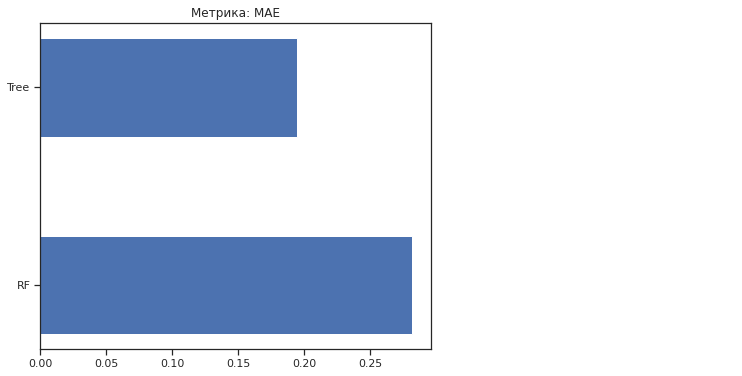

In [108]:
regrMetricLogger.plot('Метрика: ' + 'MAE', 'MAE', 
                      ascending=False, figsize=(7, 6))

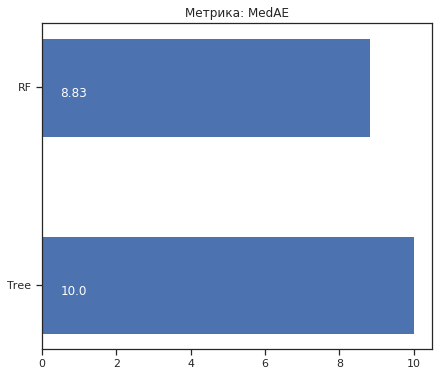

In [220]:
regrMetricLogger.plot('Метрика: ' + 'MedAE', 'MedAE', 
                      ascending=False, figsize=(7, 6))

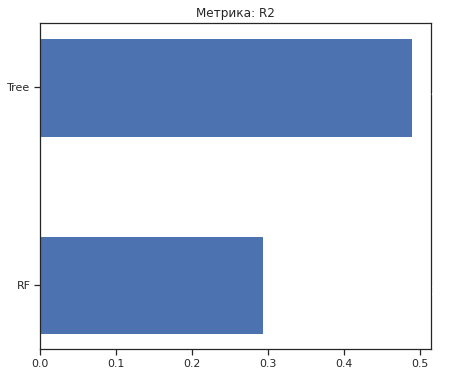

In [109]:
regrMetricLogger.plot('Метрика: ' + 'R2', 'R2',
                      ascending=True, figsize=(7, 6))


### Вывод:
Лучше всего показала себя модель случайный лес, на втором месте - ансамблевая модель, на третьем - дерево решений. Однако в другой задаче в лабораторной работе лучше показала себя ансамблевая модель, так что в дальнейшем можно использовать обе эти модели и проверять, какая будет работать лучше для конкретной задачи. 